# Airbnb User Data Exploration


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw inline
%matplotlib inline

#Set figure design style
sns.set_style('white', {'ytick.major.size':5.0})
sns.set_context('poster', font_scale = 1.5)

## Data Exploration

When starting a new project, I want to look at it from three different perspective:
1. Does the data have speciel patterns or behavior?
2. Is there something wrong with the data?
3. Do I have to fix or remove any of the data considering the first two point?


In [2]:
# Loading data

train_users = pd.read_csv('C:/Users/hongy/Desktop/dataanalyst/data analysis project/airbnb/train_users_2.csv')
test_users = pd.read_csv('C:/Users/hongy/Desktop/dataanalyst/data analysis project/airbnb/test_users.csv')

In [3]:
# Show data records

print('There are', train_users.shape[0], 'users in train set.')
print('There are', test_users.shape[0], 'users in test set.')
print('There are', train_users.shape[0]+test_users.shape[0],'users in total.')

There are 213451 users in train set.
There are 62096 users in test set.
There are 275547 users in total.


Next step, combine train and test data set together.

In [4]:
# Merge train set and test set
users_all = pd.concat((train_users, test_users), axis = 0, ignore_index = True)

# Remove IDs, there is no need for them in the exploration process
users_all.drop('id', axis = 1, inplace = True)

users_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


### Missing Data

The first thing we are going to do is to look at the missing data.

Except for the variable 'gender', all others' missing data appear to be NAN.
The 'gender' has '-unknown-' instead, and we are going to transfer it into NaN.



In [5]:
users_all.gender.replace('-unknown-', np.nan, inplace=True)
users_all.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105


Then we will see how much data that are missing.

In [6]:
users_missing = (users_all.isnull().sum() / users_all.shape[0]) *100
users_missing

affiliate_channel           0.000000
affiliate_provider          0.000000
age                        42.412365
country_destination        22.535538
date_account_created        0.000000
date_first_booking         67.733998
first_affiliate_tracked     2.208335
first_browser               0.000000
first_device_type           0.000000
gender                     46.990169
language                    0.000000
signup_app                  0.000000
signup_flow                 0.000000
signup_method               0.000000
timestamp_first_active      0.000000
dtype: float64

In [7]:
users_missing[users_missing > 0 ]

age                        42.412365
country_destination        22.535538
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

We can see that we have a lot of missing values in 'age' and 'gender', and that will influce our classifier's performance. 
Note: the 67% of missing value for "date_first_booking" results from the missing values from test set.

Now, let's dive more into different variables.
We take age firstly.

In [8]:
users_all.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

There are some strange values in the age variable. This could happen due to the inappropriate input process.

In [9]:
print(sum(users_all.age > 122))
print(sum(users_all.age < 18))

830
188


These records may have some potential problems. 122 is the longest confirmed human lifespan, and 18 is the legal age in the airbnb's agreement.

In [10]:
users_all[users_all.age > 122]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

We can find a lot of values of 2014 in the potential wrong age values. This might result from wrong data input.

In [11]:
users_all[users_all.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

There are 50% of users are over 16 years old, which is acceptable.   
In the next process we are going to set a age range and leave others out of the range to be NaN.

In [12]:
users_all.loc[users_all.age > 90, 'age'] = np.nan
users_all.loc[users_all.age < 13, 'age'] = np.nan

### Data Type Transformation

In the next step, we are going to transform each variable into right data types. First comes with the categorical variables.


In [13]:
categorical_variables = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for variable in categorical_variables:
    users_all[variable] = users_all[variable].astype('category')

Then we are going to change all the date variables to date format.

In [14]:
users_all['date_account_created'] = pd.to_datetime(users_all['date_account_created'])
users_all['date_first_booking'] = pd.to_datetime(users_all['date_first_booking'])
users_all['date_first_active'] = pd.to_datetime((users_all.timestamp_first_active// 1000000), format = '%Y%m%d' )

Let's check whether we have got the right data types!

In [15]:
users_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
affiliate_channel          275547 non-null category
affiliate_provider         275547 non-null category
age                        155694 non-null float64
country_destination        213451 non-null category
date_account_created       275547 non-null datetime64[ns]
date_first_booking         88908 non-null datetime64[ns]
first_affiliate_tracked    269462 non-null category
first_browser              275547 non-null category
first_device_type          275547 non-null category
gender                     146067 non-null category
language                   275547 non-null category
signup_app                 275547 non-null category
signup_flow                275547 non-null int64
signup_method              275547 non-null category
timestamp_first_active     275547 non-null int64
date_first_active          275547 non-null datetime64[ns]
dtypes: category(10), datetime64[ns](3), float6

### Data Visualization

Let's create some visaulization to look deeply into different variables.


#### Gender

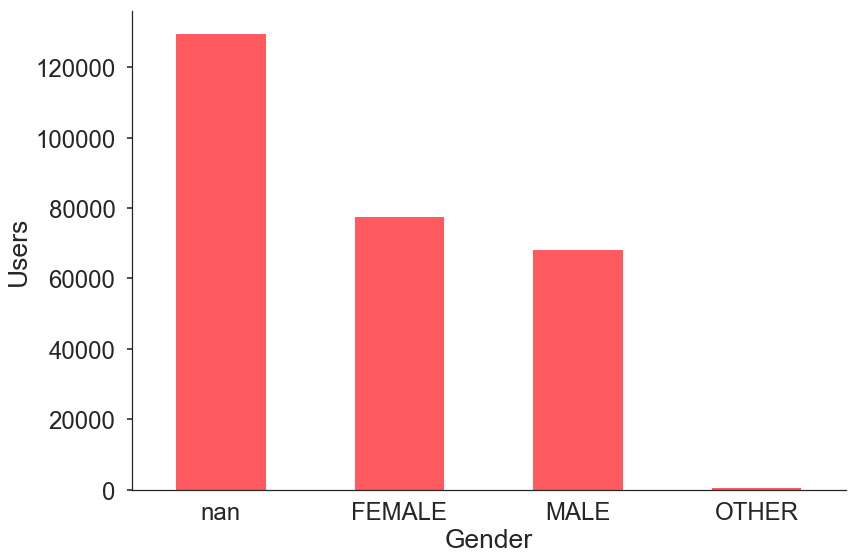

In [16]:
users_all.gender.value_counts(dropna = False).plot(kind = 'bar', color = '#FF5A60', rot = 0)
plt.xlabel('Gender')
plt.ylabel('Users')
sns.despine()

Now we can see the percentage of missing values in the gender variable, as well as the slight difference of female and male. There are potentially higher percentage of female than male.  
  
Next, we are going to see if there is any gender features in terms of travelling.

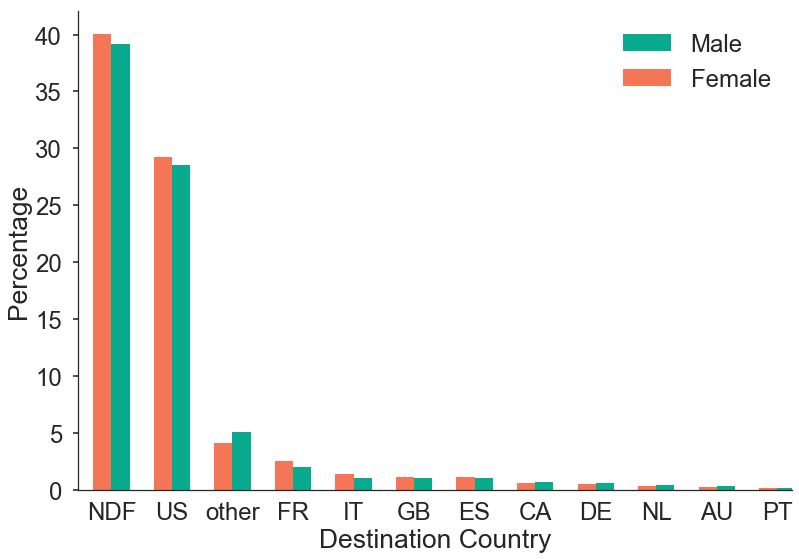

In [17]:
female = sum(users_all.gender == 'FEMALE')
male = sum(users_all.gender == 'MALE')

female_destinations = users_all.loc[users_all['gender'] == 'FEMALE', 'country_destination'].value_counts() / female * 100
male_destinations = users_all.loc[users_all['gender'] == 'MALE', 'country_destination'].value_counts()/ male * 100



male_destinations.plot(kind = 'bar', width = 0.3, color ='#08AB8D', label = 'Male',position = 0, rot = 0 )
female_destinations.plot(kind = 'bar', width = 0.3, color ='#F47656', label = 'Female',position = 1,rot = 0 )

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()


We could find out that there is no huge difference in terms of destination countries for different genders. So we would like to combine the gender together.

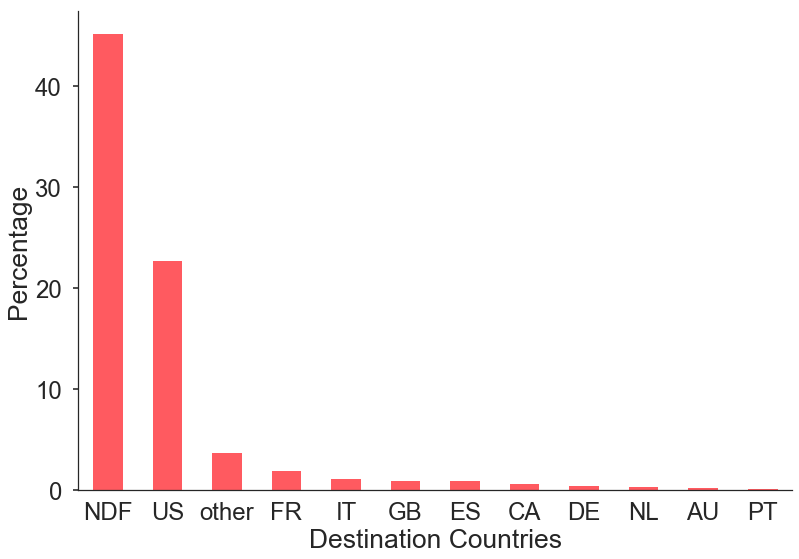

In [18]:
destinations_pt = users_all.country_destination.value_counts() / users_all.shape[0] *100
destinations_pt.plot(kind = 'bar', color = '#FF5A60', rot = 0)

plt.xlabel('Destination Countries')
plt.ylabel('Percentage')

sns.despine()

From this graph we can tell that there are more than 40% users haven't make any reservation. And in those who have made reservations, US is the top destination.


### Age
  


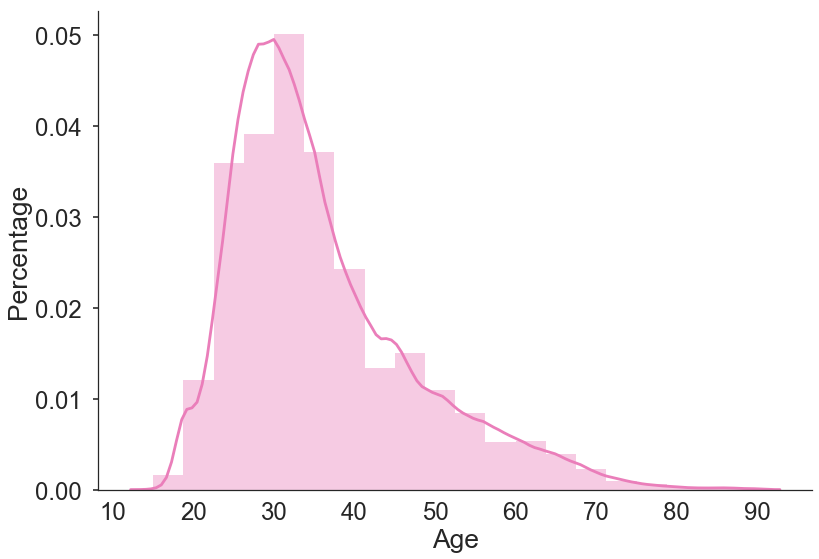

In [19]:
sns.distplot(users_all.age.dropna(),bins = 20, color = '#EA7EBA')


plt.xlabel('Age')
plt.ylabel('Percentage')
sns.despine()

As we can tell from the graph, 25 to 45 are the most comon age. And we want to dig deeper to questions like, do older people travel in different ways? (in terms of destination countries)  
First, we need to divide users into two different age groups.

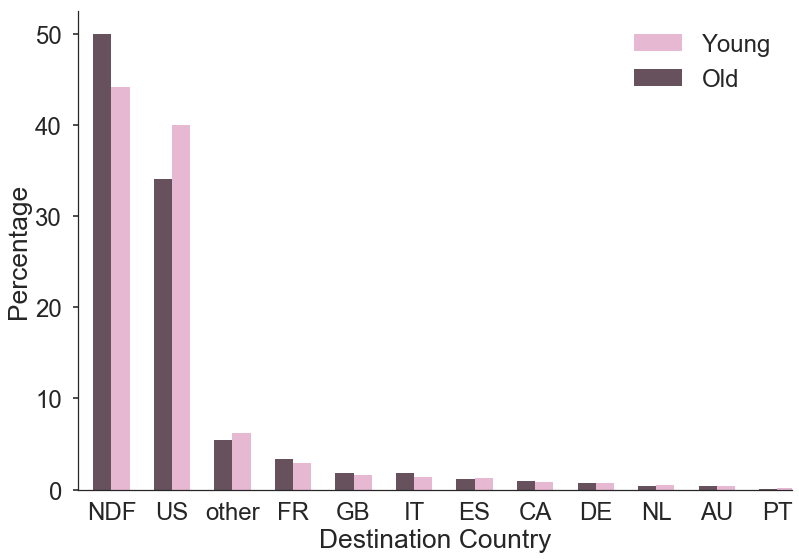

In [20]:
# We use 45 as our divider

divider = 45

young = users_all.loc[users_all['age'] < divider, 'country_destination'].value_counts()
old = users_all.loc[users_all['age'] > divider, 'country_destination'].value_counts()

young_sum = sum(young)
old_sum = sum(old)

young_destinations = young / young_sum * 100
old_destinations = old / old_sum * 100

young_destinations.plot(kind = 'bar', width = 0.3, color ='#E7B8D2', position = 0, label = 'Young', rot = 0 )
old_destinations.plot(kind = 'bar', width = 0.3, color ='#66515D', position = 1, label = 'Old', rot = 0 )

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

We can see that younger people are more tend to stay in U.S. than older people, but the difference is not huge. Remember, we have 42% of users that we don't know their age, so this could bring differences too.  
  
  We also want to look at user's native language features and how it affects their destinations.

In [21]:
print(sum(users_all.language == 'en') / users_all.shape[0])

0.963675888324


#### Dates

In terms of date variables, let's first look at the number of accounts first created by time.

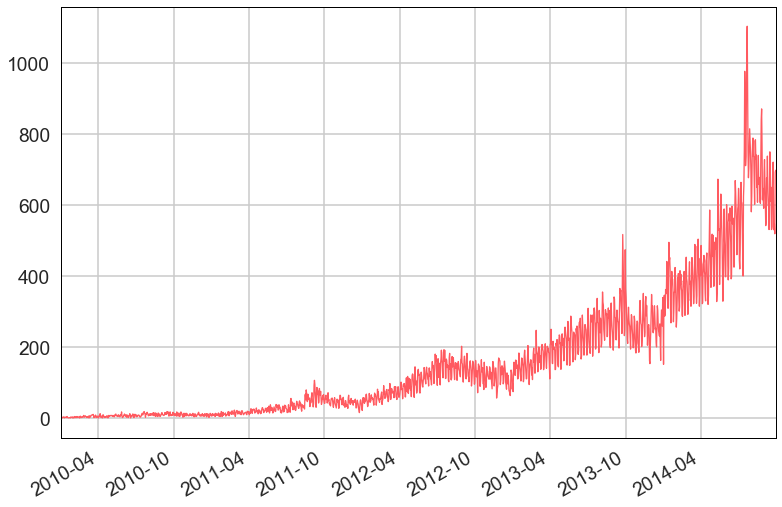

In [37]:
sns.set_style('whitegrid',{'axes.edgecolor':'0'})
sns.set_context("poster", font_scale = 1.2)

users_all.date_account_created.value_counts().plot(kind = 'line', linewidth = 1.3, color = '#FF5A60')

We can see how fast that Airbnb grow in 2010 to 2014. Now we are going to check what's the trend for users was active for the first time. It should be looked similar as this visualization.

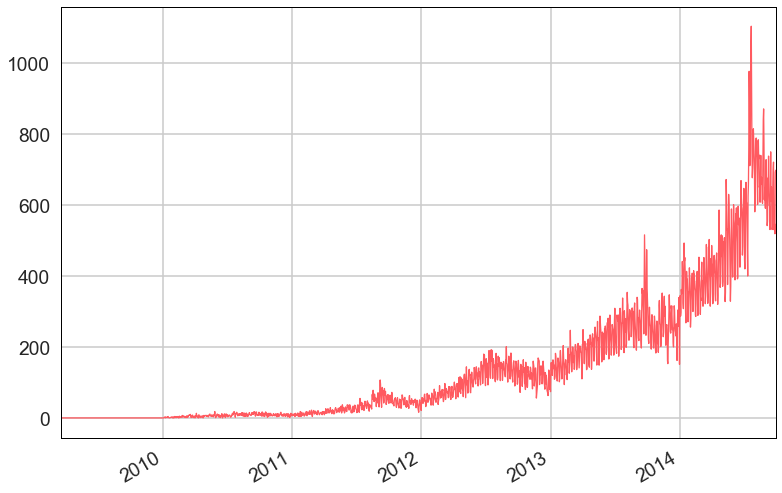

In [38]:
users_all.date_first_active.value_counts().plot(kind = 'line', linewidth = 1.3, color = '#FF5A60')

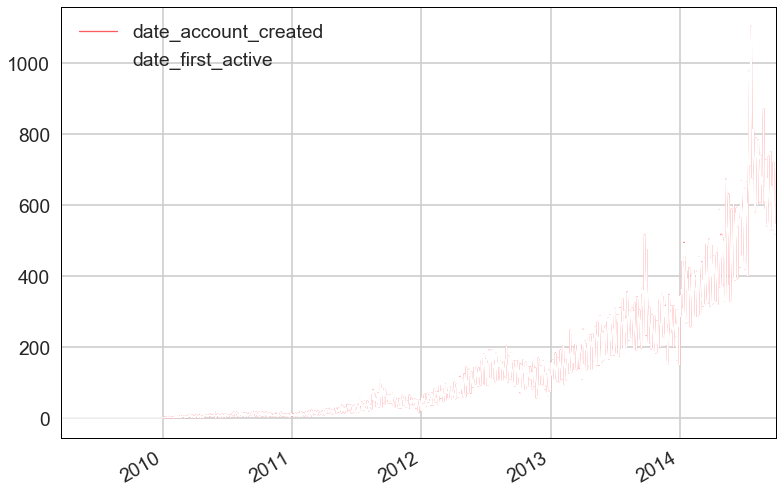

In [43]:
users_all.date_account_created.value_counts().plot(kind = 'line', linewidth = 1.3, color = '#FF5A60')
users_all.date_first_active.value_counts().plot(kind = 'line', linewidth = 1.3, color = 'white')

plt.legend()

When we combine the two plots together, we can see they are almost the same.  
Notice the peaks in the plot, and we are going to dig deeper into those peaks.

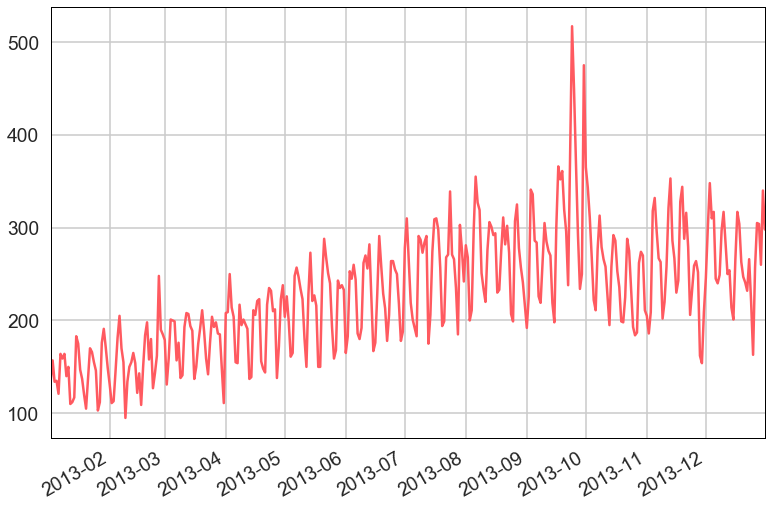

In [52]:
users_all_2013 = users_all[users_all['date_first_active'] > pd.to_datetime(20130101, format = '%Y%m%d')]
users_all_2013 = users_all_2013[users_all_2013['date_first_active'] < pd.to_datetime(20140101, format = '%Y%m%d')]

users_all_2013.date_first_active.value_counts().plot(kind = 'line', linewidth = 2.5, color = '#FF5A60')


At first glance, we can see some patterns in the peaks. They seems to happen in the same distances. Let's look closer to find out the real pattern.

In [57]:
weekdays = []

for date in users_all.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

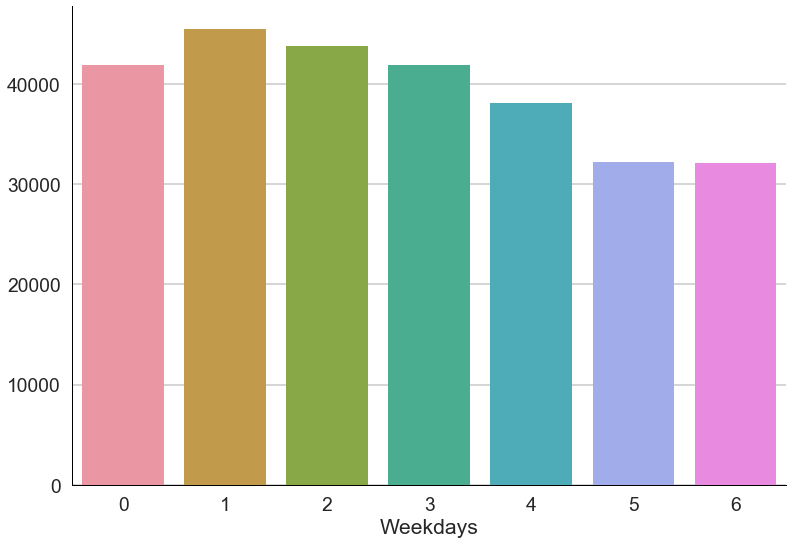

In [60]:
sns.barplot(x = weekdays.value_counts().index, y = weekdays.value_counts().values, order = range(0,7))
plt.xlabel('Weekdays')

sns.despine()

Notice in Pandas weekday index, 0 is monday and 6 is sunday.  
It's interesting to find out, the low point is sunday, where people probabaly use less Internet, and the hottest weekday for account created is Tuesday! It's the weekday that people all feel boring and want some excitements!


In the last, we want to see the countries destination differences in terms of before 2014 and after 2014.

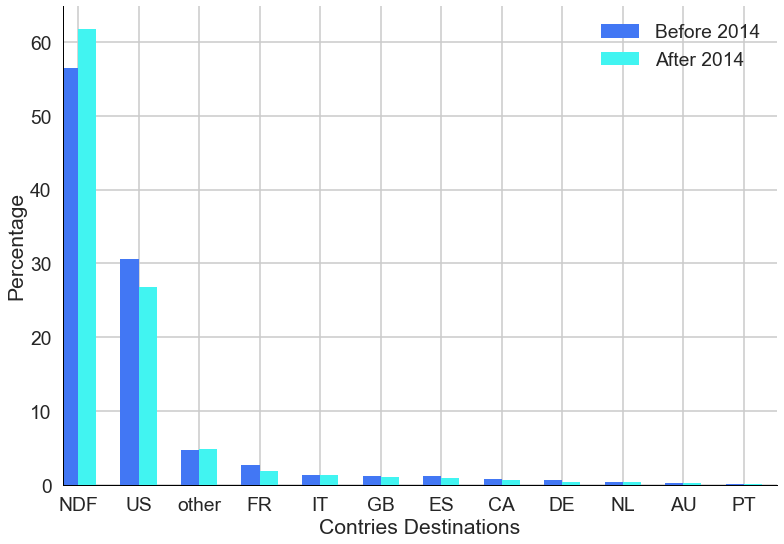

In [78]:
date = pd.to_datetime(20140101, format = '%Y%m%d')

before_users = users_all.loc[users_all['date_first_active'] < date, 'country_destination'].value_counts()
after_users = users_all.loc[users_all['date_first_active'] > date, 'country_destination'].value_counts()

before_destinations = before_users / sum(before_users) * 100
after_destinations = after_users / sum(after_users) * 100

before_destinations.plot(kind = 'bar', width = 0.3, color = '#4277f4', position = 1, label = 'Before 2014', rot = 0)
after_destinations.plot(kind = 'bar', width = 0.3, color = '#41f4f1', position = 0, label = 'After 2014', rot = 0)

plt.legend()
plt.xlabel('Contries Destinations')
plt.ylabel('Percentage')

sns.despine()
plt.show()

This plot shows that new users after 2014 are more likely to go outside of U.S., and this probably thanks to Airbnb's global development. 

This is a breif user exploration of Airbnb's user data set.  
Happy coding! :)